# Data Analysis

## Importing libraries

The neccessary libraries for this notebook are imported along with the project library <br>
Libraries used:
- Pandas & Numpy : Data Handling
- Seaborn & Matplotlib : Data Visualisation
- Tabulate : To display tables 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

project_token = 'p-3f704f3cdf69a8a61cd7aa18710a153652a855a1'

from project_lib import Project
project = Project( project_access_token=project_token)
pc = project.project_context

from tabulate import tabulate

The code below does some styling chanages to have better looking graphs from _seaborn_

In [2]:
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('rainbow')

## Importing Data

Since the data is stored in theproject itself, it can be imported using prebuit _IBM waston studio_ commands.

In [3]:
# The code was removed by Watson Studio for sharing.

The imported data is stored in a dataframe called _Data_

In [4]:
data  = pd.read_csv(body)

Viewing the top 5 rows tio ensure proper import using the ```.head()``` function from _pandas_

In [5]:
data.head()

,selling_price (in lakhs),age,seller_type,km_driven (in thousands),owner_type,fuel_type,transmission_type,mileage,engine_size (in cc),max_power (in bhp),seats,maker,model,variant
0,1.20,9.0,Individual,120.0,First Owner,Petrol,Manual,19.70,796,46.30,5,MARUTI,ALTO,STD
1,5.50,5.0,Individual,20.0,First Owner,Petrol,Manual,18.90,1197,82.00,5,HYUNDAI,GRAND,I10 ASTA
2,2.15,11.0,Individual,60.0,First Owner,Petrol,Manual,17.00,1197,80.00,5,HYUNDAI,I20,ASTA
3,2.26,9.0,Individual,37.0,First Owner,Petrol,Manual,20.92,998,67.10,5,MARUTI,ALTO,K10 2010-2014 VXI
4,5.70,6.0,Dealer,30.0,First Owner,Diesel,Manual,22.77,1498,98.59,5,FORD,ECOSPORT,2015-2021 1.5 TDCI TITANIUM BSIV


## Exploratory Data Analysis

This is the section where we examine the data and its features. The primary focus is to look at the distribution of features on their own and not their relation ship with target variable or other features.<br>
The various sections here are:-<br>
 - [Outlier Calculation Class](#Outlier-Calculation-Class)
 - [Missing Values per Feature](#Missing-Values-per-feature)
 - [Total No. Of Unique Values per Feature](#Total-No.-Of-Unique-Values-per-feature)
 - [Most Frequent Values per Feature](#Most-Frequent-Values-per-feature)
 - [Distriburion of Selling Price](#Distriburion-of-Selling-Price)
 - [Distribution of Age](#Distribution-of-Age)
 - [Distribution of Kilometers Driven](#Distribution-of-Kilometers-Driven)
 - [Seller Type Distribution](#Seller-Type-Distribution)
 - [Owner Type Distribution](#Owner-Type-Distribution)
 - [Transmission Type Distribution](#Transmission-Type-Distribution)
 - [Fuel Type Distribution](#Fuel-Type-Distribution)
 - [Seat Type Distribution](#Seat-Type-Distribution)
 - [Distribution by Max Power](#Distribution-by-Max-Power)
 - [Distribution by Engine Size](#Distribution-by-Engine-Size)
 - [Distribution by Mileage](#Distribution-by-Mileage)


### Outlier Calculation Class

Creating a class _Outlier_params_ to calculate the IQR, upper bound and lower bound thata can be used for easy detection of outliers

In [6]:
class Outlier_params:
    def __init__(self, dataframe, column):
        self.dataframe = dataframe
        self.column = column
        self.descriptors = dataframe[column].describe()
        self.IQR = self.descriptors['75%'] - self.descriptors['25%']
        self.lower = self.descriptors['25%'] - (1.5*self.IQR)
        self.upper = self.descriptors['75%'] + (1.5*self.IQR)
        
    def descriptors(self):
        return(self.descriptors)
        
    def IQR(self):        
        return(self.IQR)
    
    def lower_Bound(self):
        return(self.lower)
    
    def upper_Bound(self):
        return(self.upper)
    
    def outliers(self):
        #outlier_data = self.dataframe[self.dataframe[self.column]>self.upper]
        outlier_data = pd.concat([self.dataframe[self.dataframe[self.column]>self.upper],
                                 self.dataframe[self.dataframe[self.column]<self.lower]],axis=0)
        return(outlier_data)

[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Missing Values per feature

In [7]:
temp=[]
for i in data.columns:
    temp.append([i,data[i].isnull().mean()])
print(tabulate(temp,headers=['Feature','% of null values']))

Feature                     % of null values
------------------------  ------------------
selling_price (in lakhs)                   0
age                                        0
seller_type                                0
km_driven (in thousands)                   0
owner_type                                 0
fuel_type                                  0
transmission_type                          0
mileage                                    0
engine_size (in cc)                        0
max_power (in bhp)                         0
seats                                      0
maker                                      0
model                                      0
variant                                    0


[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Total No. Of Unique Values per feature

In [8]:
temp=[]
for i in data.columns:
    temp.append([i,data[i].unique().size])
print(tabulate(temp,headers=['Feature','Unique Values']))

Feature                     Unique Values
------------------------  ---------------
selling_price (in lakhs)             1190
age                                    27
seller_type                             3
km_driven (in thousands)             4443
owner_type                              3
fuel_type                               5
transmission_type                       2
mileage                               531
engine_size (in cc)                   166
max_power (in bhp)                    486
seats                                   9
maker                                  41
model                                 264
variant                              2926


[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Most Frequent Value per feature

In [9]:
temp=[]
for i in data.columns:
    temp.append([i,data[i].mode()[0]])
print(tabulate(temp,headers=['Feature','Most Frequent Values']))

Feature                   Most Frequent Values
------------------------  ----------------------
selling_price (in lakhs)  4.5
age                       4.0
seller_type               Dealer
km_driven (in thousands)  50.0
owner_type                First Owner
fuel_type                 Diesel
transmission_type         Manual
mileage                   18.9
engine_size (in cc)       1197
max_power (in bhp)        74.0
seats                     5
maker                     MARUTI
model                     SWIFT
variant                   DZIRE VDI


[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Distribution of Selling Price

A histogram will be used to see the disstribution of the resale vehicles of cars

[Text(0.5, 0, ' Selling Price (in lakhs)'),
 Text(0, 0.5, 'Cars Sold'),
 Text(0.5, 1.0, 'Cars Sold distributed by Selling Price (in lakhs)')]

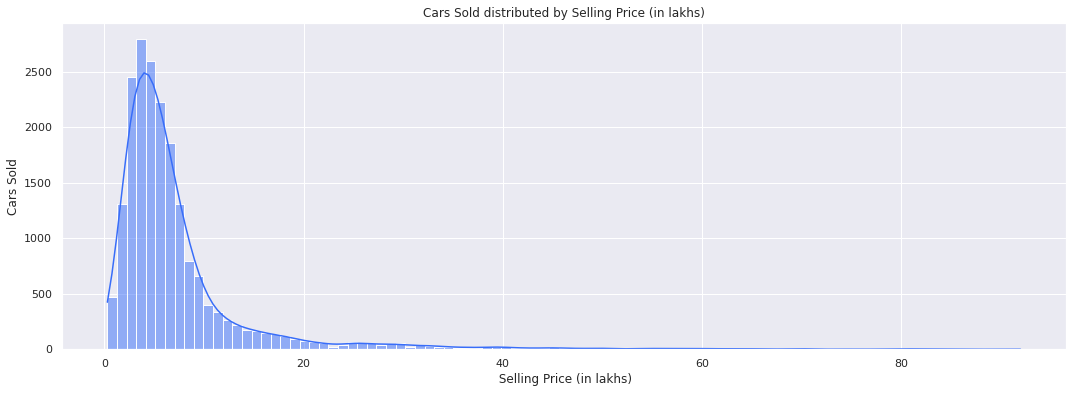

In [30]:
plt.figure(figsize=(18,6))
ax = sns.histplot(data=data['selling_price (in lakhs)'],bins=95,kde=True)
ax.set(xlabel=" Selling Price (in lakhs)", ylabel = "Cars Sold", title='Cars Sold distributed by Selling Price (in lakhs)')

From the histogram, it is clear that:<br>
- Most of the cars sold are below Rs.10 Lakh
- There are negligible cars with a resale above Rs.40 Lakh

[Text(0.5, 0, 'Selling Price (in Lakhs)'),
 Text(0.5, 1.0, 'Selling Price (in Lakhs) Boxplot')]

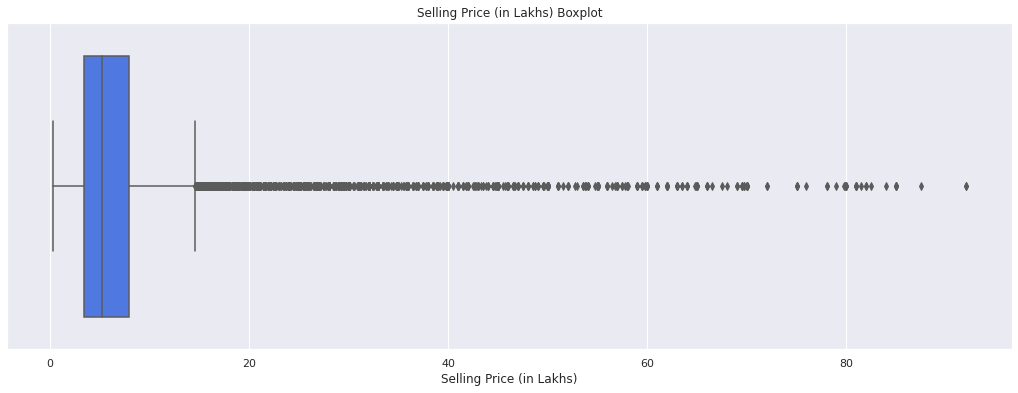

In [27]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(data=data,x='selling_price (in lakhs)')
ax.set(xlabel="Selling Price (in Lakhs)", title='Selling Price (in Lakhs) Boxplot')

From the boxplot, it is clear that:<br>
- Range is from roughly 0 to 15
- The median is around 5

In [12]:
sp_outliers = Outlier_params(data,'selling_price (in lakhs)')
print('Key Descriptors','\n',sp_outliers.descriptors)
print('\n')
print('Number of outliers',sp_outliers.outliers().shape[0])

Key Descriptors 
 count    19631.000000
mean         7.358779
std          8.049975
min          0.300000
25%          3.450000
50%          5.250000
75%          7.900000
max         92.000000
Name: selling_price (in lakhs), dtype: float64


Number of outliers 1779


[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Distribution of Age

[Text(0.5, 0, 'Age of Car'),
 Text(0, 0.5, 'Cars Sold'),
 Text(0.5, 1.0, 'Cars Sold distributed by Age')]

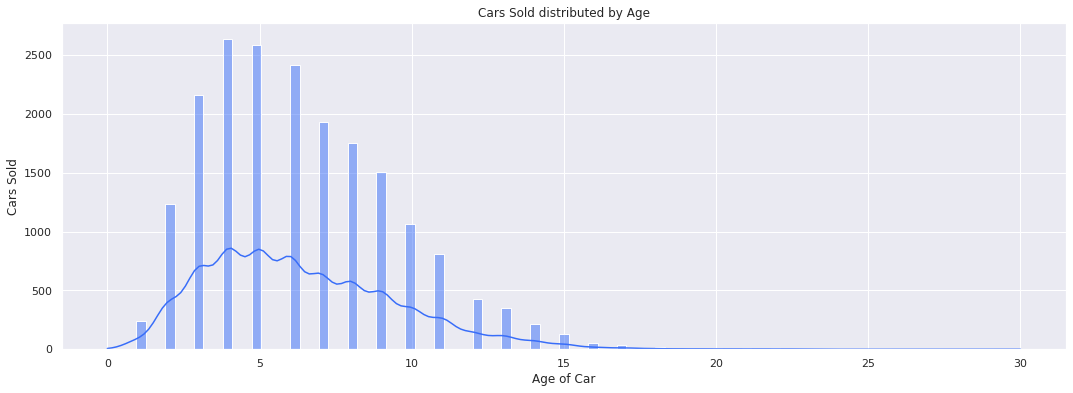

In [28]:
plt.figure(figsize=(18,6))
ax = sns.histplot(data=data['age'],bins=95,kde=True)
ax.set(xlabel="Age of Car", ylabel = "Cars Sold", title='Cars Sold distributed by Age')

From the histogram, it is clear that:<br>
- Most of the cars are from 0 to 10 years old
- There are negligible cars older than 15 years

<AxesSubplot:xlabel='age'>

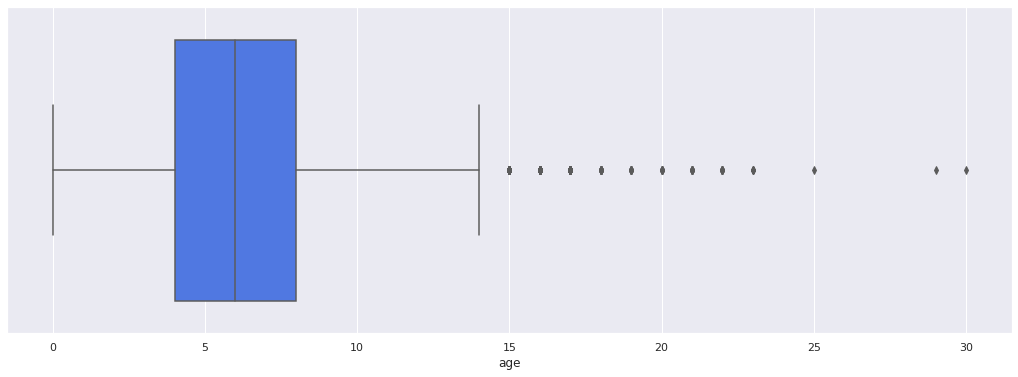

In [14]:
plt.figure(figsize=(18,6))
sns.boxplot(data=data,x='age')

From the boxplot, it is clear that:<br>
- Range is from roughly 0 to 14
- The median is around 6

In [15]:
age_outliers = Outlier_params(data,'age')
print('Key Descriptors','\n',age_outliers.descriptors)
print('\n')
print('Number of outliers',age_outliers.outliers().shape[0])

Key Descriptors 
 count    19631.000000
mean         6.388060
std          3.163017
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         30.000000
Name: age, dtype: float64


Number of outliers 287


[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Distribution of Kilometers Driven

In [16]:
data = data[data['km_driven (in thousands)']<1000]

[Text(0.5, 0, 'Kilometres Driven (in thousand)'),
 Text(0, 0.5, 'Cars Sold'),
 Text(0.5, 1.0, 'Cars Sold distributed by Kilometres driven (in thousand)')]

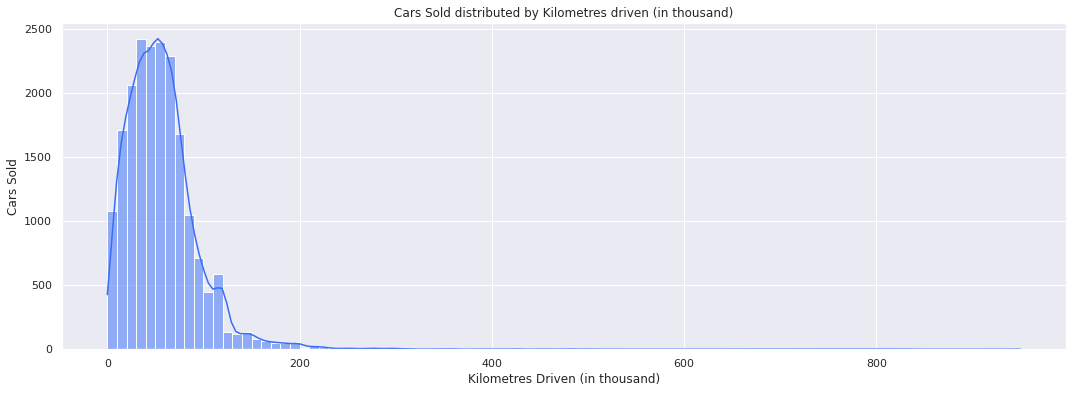

In [29]:
plt.figure(figsize=(18,6))
ax = sns.histplot(data=data['km_driven (in thousands)'],bins=95,kde=True)
ax.set(xlabel="Kilometres Driven (in thousand)", ylabel = "Cars Sold", title='Cars Sold distributed by Kilometres driven (in thousand)')

From the histogram, it is clear that:<br>
- Most of the cars with less than 150 thousand kms
- There are negligible cars with more than 200 thousand kms

In [18]:
km_outliers = Outlier_params(data,'km_driven (in thousands)')
print('Key Descriptors','\n',km_outliers.descriptors)
print('\n')
print('Number of outliers',km_outliers.outliers().shape[0])

Key Descriptors 
 count    19629.000000
mean        57.617136
std         41.909322
min          0.100000
25%         31.000000
50%         51.452000
75%         73.001000
max        950.000000
Name: km_driven (in thousands), dtype: float64


Number of outliers 636


[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Seller Type Distribution

[Text(0.5, 0, 'Seller Type'),
 Text(0, 0.5, 'Cars Sold'),
 Text(0.5, 1.0, 'Cars Sold per Seller Type')]

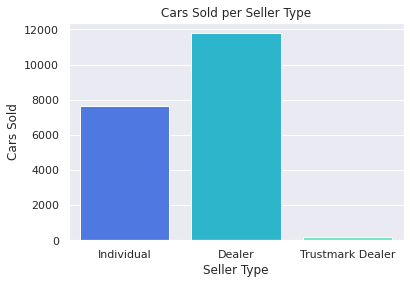

In [19]:
ax = sns.countplot(data=data,x='seller_type')
ax.set(xlabel="Seller Type", ylabel = "Cars Sold", title='Cars Sold per Seller Type')

[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Owner Type Distribution

[Text(0.5, 0, 'Owner Type'),
 Text(0, 0.5, 'Cars Sold'),
 Text(0.5, 1.0, 'Cars Sold per Owner Type')]

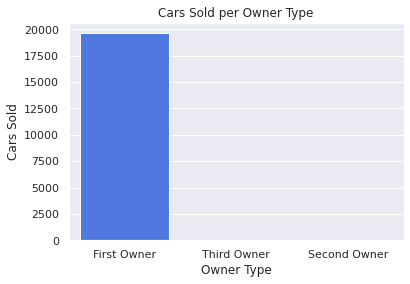

In [20]:
ax = sns.countplot(data=data,x='owner_type')
ax.set(xlabel="Owner Type", ylabel = "Cars Sold", title='Cars Sold per Owner Type')

[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Transmission Type Distribution

[Text(0.5, 0, 'Transmission Type'),
 Text(0, 0.5, 'Cars Sold'),
 Text(0.5, 1.0, 'Cars Sold per Transmission Type')]

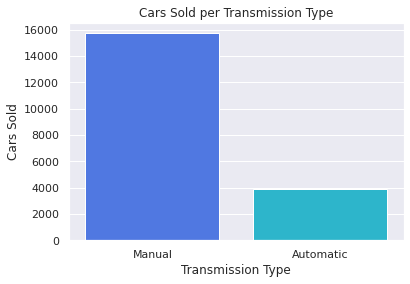

In [21]:
ax = sns.countplot(data=data,x='transmission_type')
ax.set(xlabel="Transmission Type", ylabel = "Cars Sold", title='Cars Sold per Transmission Type')

[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Fuel Type Distribution

[Text(0.5, 0, 'Fuel Type'),
 Text(0, 0.5, 'Cars Sold'),
 Text(0.5, 1.0, 'Cars Sold per Fuel Type')]

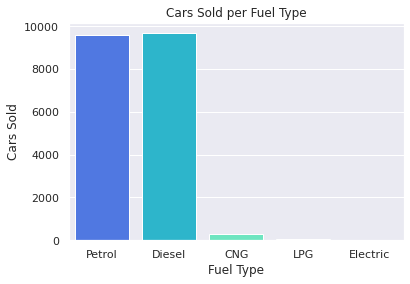

In [22]:
ax = sns.countplot(data=data,x='fuel_type')
ax.set(xlabel="Fuel Type", ylabel = "Cars Sold", title='Cars Sold per Fuel Type')

[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Seat Type Distribution

[Text(0.5, 0, 'Number of Seats'),
 Text(0, 0.5, 'Cars Sold'),
 Text(0.5, 1.0, 'Cars Sold per Seat Number')]

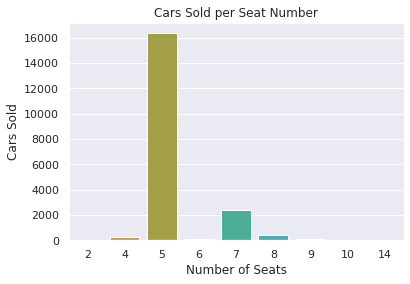

In [23]:
ax = sns.countplot(data=data,x='seats')
ax.set(xlabel="Number of Seats", ylabel = "Cars Sold", title='Cars Sold per Seat Number')

[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Distribution by Max Power

[Text(0.5, 0, 'Max Power (in bhp)'),
 Text(0, 0.5, 'Cars Sold'),
 Text(0.5, 1.0, 'Cars Sold distributed by max power (in bhp)')]

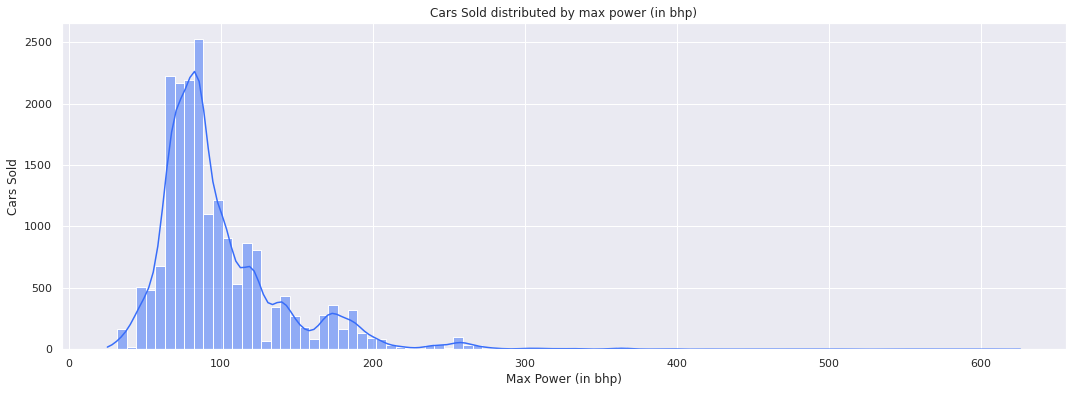

In [31]:
plt.figure(figsize=(18,6))
ax = sns.histplot(data=data['max_power (in bhp)'],bins=95,kde=True)
ax.set(xlabel="Max Power (in bhp)", ylabel = "Cars Sold", title='Cars Sold distributed by max power (in bhp)')

From the histogram, it is clear that:<br>
- Most of the cars with less than 200bhp
- There are negligible cars with more than 300bhp

[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Distribution by Engine Size

[Text(0.5, 0, 'Engine size (in cc)'),
 Text(0, 0.5, 'Cars Sold'),
 Text(0.5, 1.0, 'Cars Sold distributed by Engine_size (in cc)')]

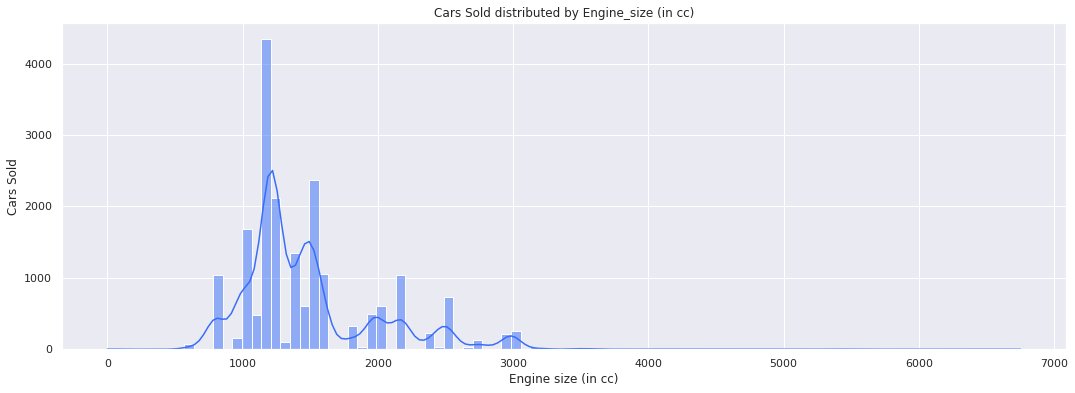

In [34]:
plt.figure(figsize=(18,6))
ax = sns.histplot(data=data['engine_size (in cc)'],bins=95,kde=True)
ax.set(xlabel="Engine size (in cc)", ylabel = "Cars Sold", title='Cars Sold distributed by Engine_size (in cc)')

From the histogram, it is clear that:<br>
- Most of the cars peak at every 0.5 litres of engine size
- Cars with engine bigger than 3000cc are rare

In [33]:
data.columns

Index(['selling_price (in lakhs)', 'age', 'seller_type',
       'km_driven (in thousands)', 'owner_type', 'fuel_type',
       'transmission_type', 'mileage', 'engine_size (in cc)',
       'max_power (in bhp)', 'seats', 'maker', 'model', 'variant'],
      dtype='object')

[**Back to EDA index** ](#Exploratory-Data-Analysis)

### Distribution by Mileage

[Text(0.5, 0, 'Mileage'),
 Text(0, 0.5, 'Cars Sold'),
 Text(0.5, 1.0, 'Cars Sold distributed by Mileage')]

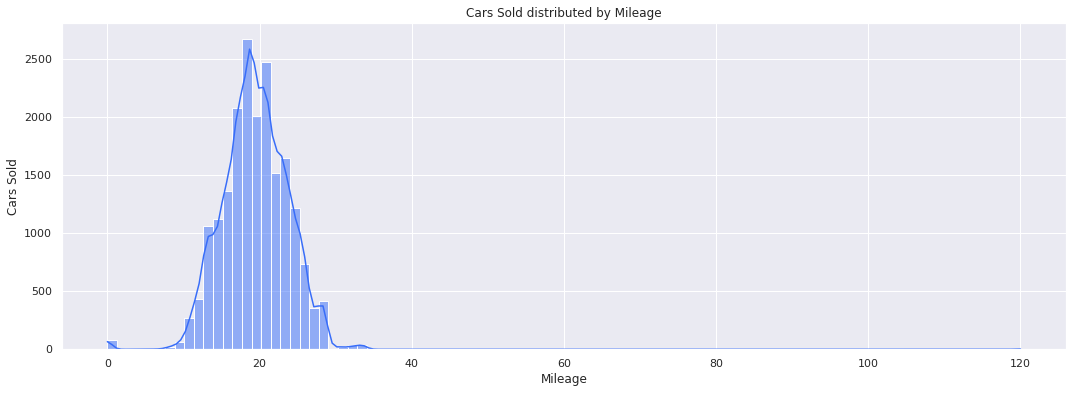

In [35]:
plt.figure(figsize=(18,6))
ax = sns.histplot(data=data['mileage'],bins=95,kde=True)
ax.set(xlabel="Mileage", ylabel = "Cars Sold", title='Cars Sold distributed by Mileage')

From the histogram, it is clear that:<br>
- Most of the cars give a mileage from 10 to 25
- Cars with mileage of more than 30 are rare

[**Back to EDA index** ](#Exploratory-Data-Analysis)

---

## Notes

### Author 
Created by **Bhavesh Jain** <br>
Github link - https://github.com/bhaveshjain1612 <br>
Linkedin Link - https://www.linkedin.com/in/bhaveshjain1612/ <br>
Kaggle link - https://www.kaggle.com/bhaveshjain1612 <br>

### Changelog


| Date      | Name | Change     |
| :---        |    :----:   |          ---: |
| 27/09/2021      | Bhavesh Jain       | Created Notebook  |
| 28/09/2021   | Bhavesh Jain        | Added Import and EDA section      |
| 2/10/2021   | Bhavesh Jain        | Added more charts in EDA      |